In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import csv
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import linregress

In [2]:
# data_path = '/Users/srinidhienaidu/Downloads/Lab 3 Binned Data - Sheet1.csv'
data_path = '/Users/srinidhienaidu/Downloads/Data from LabChart - Sheet1.csv'
roach_data = pd.read_csv(data_path)

In [3]:
roach_data.keys()

Index(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Page No'], dtype='object')

In [4]:
roach_pages = roach_data['Page No']

In [5]:
num_data_pts = []
data_pg_idx = {}

for page in np.arange(4):
    page_num = page + 1
    page_idxs = (np.where(np.array(roach_pages) == page_num)[0])
    data_pg_idx[page] = page_idxs
    num_data_pts.append(page_idxs.shape[0])

T_PTS = np.min(np.array(num_data_pts))
NUM_PGS = len(data_pg_idx)

In [6]:
clipped_data = {}
for page in range(NUM_PGS):

    clipped_d = np.zeros((4, T_PTS - 1))

    indices = data_pg_idx[page][1:T_PTS]
    for channel in np.arange(5, 9):
        key = f'Channel {channel}'
        clipped_d[channel - 5] = np.array(roach_data[key])[indices]

    clipped_data[f'Page {page}' ] = clipped_d

In [7]:
right_fan = [0, 3, 6]
left_fan = [1, 4, 7]
back_fan = [2, 5, 8]

In [8]:
def avg_data(fan):
    trial_1 = clipped_data[f'Page {fan[0]}']
    trial_2 = clipped_data[f'Page {fan[1]}']
    trial_3 = clipped_data[f'Page {fan[2]}']

    avg = np.stack([trial_1, trial_2, trial_3]).mean(axis=0)
    return avg

In [49]:
left_avg = avg_data(left_fan)
right_avg = avg_data(right_fan)
back_avg = avg_data(back_fan)

labels = ['Left Forewing',
'Right Forewing',
'Left Hindwing',
'Right Hindwing']

colors = ['r', 'mediumblue', 'seagreen', 'deeppink']

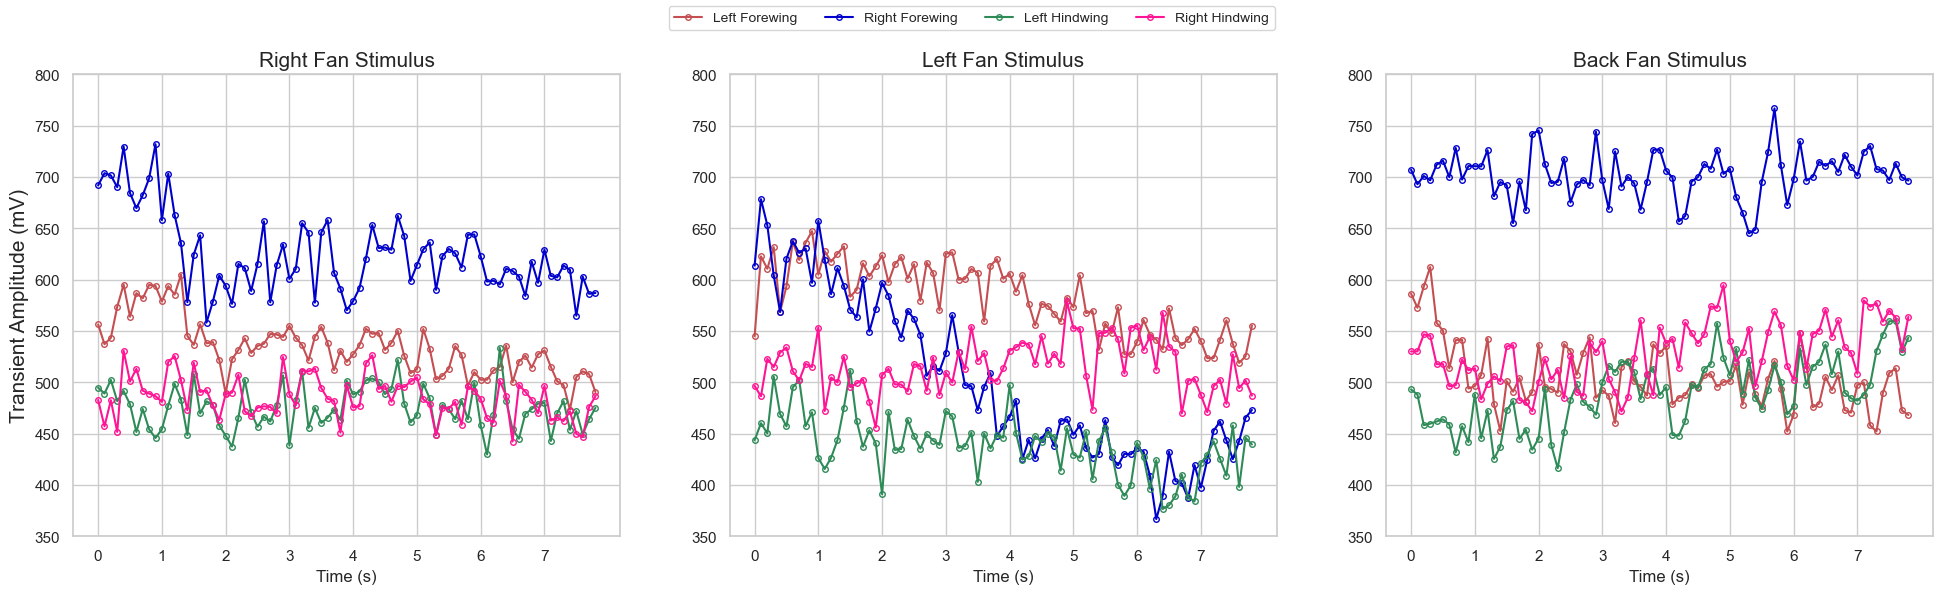

In [66]:
fig, (a1, a2, a3) = plt.subplots(1, 3, figsize=(24, 6))

# Assuming the data length corresponds to 8 time points
num_points = 80
tick_positions = np.arange(0, num_points, 10)  # Correctly spaced tick positions (0, 1, ..., 7)
tick_labels = [str(int(i/10)) for i in tick_positions]  # Labels from 1 to 8

for channel in range(4):
    a1.plot(left_avg[channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel], label=labels[channel])
    a2.plot(right_avg[channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel])
    a3.plot(back_avg[channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel])

    a1.set_ylim(350, 800)
    a2.set_ylim(350, 800)
    a3.set_ylim(350, 800)

    a1.set_title('Right Fan Stimulus', fontsize=15)
    a2.set_title('Left Fan Stimulus', fontsize=15)
    a3.set_title('Back Fan Stimulus', fontsize=15)

# Apply the tick positions and labels to each subplot
for ax in (a1, a2, a3):
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)

a1.set_xlabel('Time (s)')
a2.set_xlabel('Time (s)')
a3.set_xlabel('Time (s)')
a1.set_ylabel('Transient Amplitude (mV)', fontsize=15)

# Consolidate legends from all subplots
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Add a legend to the figure
fig.legend(lines, labels, loc='upper center', ncol=4, fontsize=10)


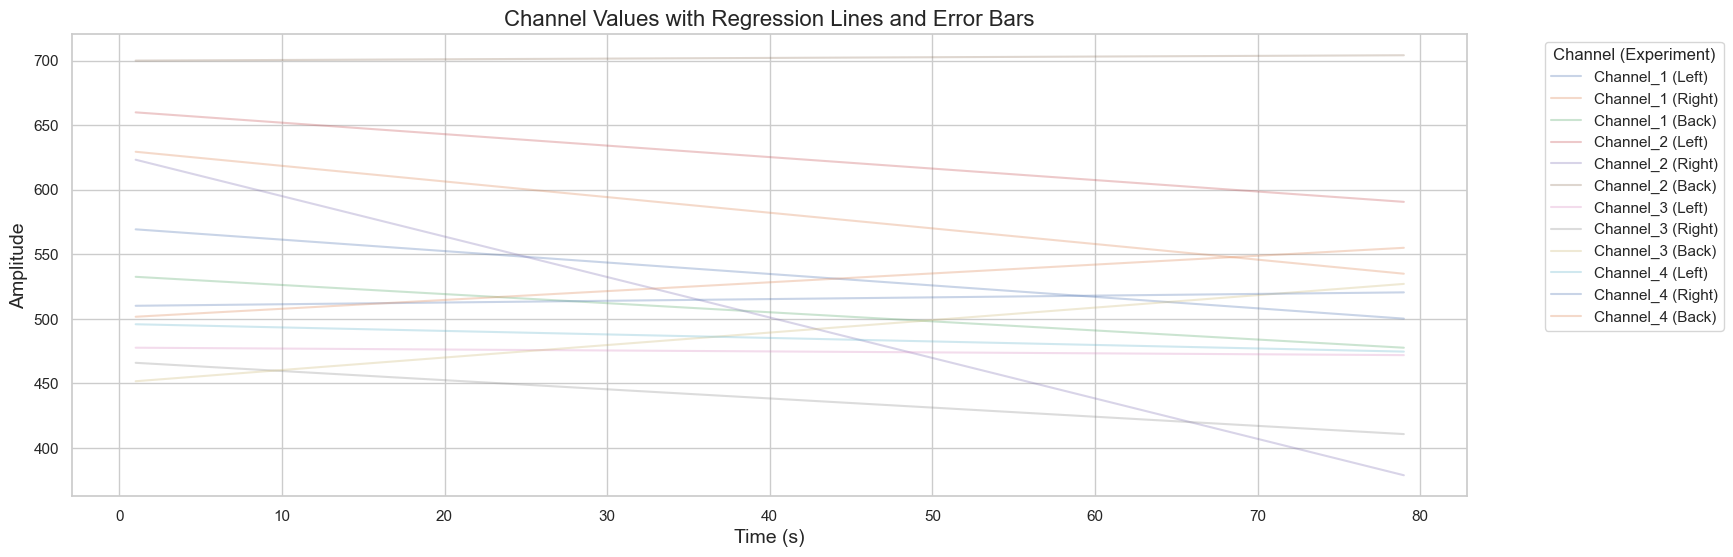

      Channel Experiment     Slope       P-Value
0   Channel_1       Left -0.886235  1.118309e-14
1   Channel_1      Right -1.210494  1.687355e-18
2   Channel_1       Back -0.703838  1.306816e-06
3   Channel_2       Left -0.888359  6.720279e-07
4   Channel_2      Right -3.132043  1.624097e-30
5   Channel_2       Back  0.053080  6.310047e-01
6   Channel_3       Left -0.073678  4.707984e-01
7   Channel_3      Right -0.707445  7.178730e-08
8   Channel_3       Back  0.966062  2.286638e-11
9   Channel_4       Left -0.271436  5.383274e-03
10  Channel_4      Right  0.133211  2.800403e-01
11  Channel_4       Back  0.684214  3.183427e-07


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data organization (assuming left_avg, right_avg, back_avg, colors, and labels exist)

# Define the experiment labels for plotting and analysis
experiments = ['Left', 'Right', 'Back']
data = []

# Combine data for all channels and experiments
for i, exp in enumerate([left_avg, right_avg, back_avg]):  # Iterate over experiments
    for channel in range(4):  # Iterate over channels
        data.extend([(time, value, f'Channel_{channel + 1}', experiments[i])
                     for time, value in enumerate(exp[channel], start=1)])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Time', 'Value', 'Channel', 'Experiment'])

# Initialize a dictionary to store regression results
regression_results = []

# Create a plot
plt.figure(figsize=(18, 6))
sns.set(style='whitegrid')

# Plot each channel for each experiment
for channel in df['Channel'].unique():
    for experiment in experiments:
        subset = df[(df['Channel'] == channel) & (df['Experiment'] == experiment)]

        # Linear regression
        slope, intercept, r_value, p_value, std_err = linregress(subset['Time'], subset['Value'])
        regression_results.append({
            'Channel': channel,
            'Experiment': experiment,
            'Slope': slope,
            'P-Value': p_value
        })

        # Regression line
        line_x = np.array(subset['Time'])
        line_y = slope * line_x + intercept
        plt.plot(line_x, line_y, label=f'{channel} ({experiment})', alpha=0.3)

        # Error bars (standard error of the mean)
        mean_values = subset.groupby('Time')['Value'].mean()
        sem_values = subset.groupby('Time')['Value'].sem()
        # plt.errorbar(subset['Time'], subset['Value'], yerr=sem_values, fmt='o', alpha=0.5)

# Adjust the plot
plt.title('Channel Values with Regression Lines and Error Bars', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.legend(title='Channel (Experiment)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the regression results
regression_df = pd.DataFrame(regression_results)
print(regression_df)


In [ ]:
wing = 0

def stats_table(wing):

    results = {"Stimulus": [], "Slope": [], "R²": [], "p-value": []}

    # Assuming time points are from the length of the dataset
    time_points = np.arange(len(left_avg[0]))
    # Perform regression for each stimulus condition
    stimuli = ["Right Fan", "Left Fan", "Back Fan"]
    data_sets = [right_avg[wing], left_avg[wing], back_avg[wing]]

    for stimulus, data in zip(stimuli, data_sets):
        slope, intercept, r_value, p_value, std_err = linregress(time_points, data)
        
        # Store the results
        results["Stimulus"].append(stimulus)
        results["Slope"].append(slope)
        results["R²"].append(r_value**2)
        results["p-value"].append(p_value)

    # Print the results
    # import pandas as pd
    results_df = pd.DataFrame(results)
    print(results_df)

In [18]:
stats_table(0)
stats_table(1)
stats_table(2)
stats_table(3)

    Stimulus     Slope        R²       p-value
0  Right Fan -1.210494  0.634433  1.687355e-18
1   Left Fan -0.886235  0.541471  1.118309e-14
2   Back Fan -0.703838  0.263611  1.306816e-06
    Stimulus     Slope        R²       p-value
0  Right Fan -3.132043  0.821247  1.624097e-30
1   Left Fan -0.888359  0.275831  6.720279e-07
2   Back Fan  0.053080  0.003011  6.310047e-01
    Stimulus     Slope        R²       p-value
0  Right Fan -0.707445  0.315596  7.178730e-08
1   Left Fan -0.073678  0.006775  4.707984e-01
2   Back Fan  0.966062  0.442463  2.286638e-11
    Stimulus     Slope        R²       p-value
0  Right Fan  0.133211  0.015137  2.800403e-01
1   Left Fan -0.271436  0.096290  5.383274e-03
2   Back Fan  0.684214  0.289342  3.183427e-07


In [30]:
left_avg.shape

(4, 79)

In [36]:
# import pandas as pd
# import numpy as np
from statsmodels.multivariate.manova import MANOVA

# Example: Organizing data
# Assuming `left_avg`, `right_avg`, `back_avg` are lists of 4-channel data for each experiment
# Convert them into a single DataFrame
data = {
    'Left_FW': np.concatenate([left_avg[0], right_avg[0], back_avg[0]]),
    'Right_FW': np.concatenate([left_avg[1], right_avg[1], back_avg[1]]),
    'Left_HW': np.concatenate([left_avg[2], right_avg[2], back_avg[2]]),
    'Right_HW': np.concatenate([left_avg[3], right_avg[3], back_avg[3]]),
    'Experiment': (['Left'] * len(left_avg[0]) + 
                   ['Right'] * len(right_avg[0]) + 
                   ['Back'] * len(back_avg[0]))
}

df = pd.DataFrame(data)

# Perform MANOVA
# Response variables: Channel_1, Channel_2, Channel_3, Channel_4
# Independent variable: Experiment
manova = MANOVA.from_formula('Left_FW + Right_FW + Left_HW + Right_HW ~ Experiment', data=df)
print(manova.mv_test())


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0038 4.0000 231.0000 15160.3544 0.0000
         Pillai's trace   0.9962 4.0000 231.0000 15160.3544 0.0000
 Hotelling-Lawley trace 262.5170 4.0000 231.0000 15160.3544 0.0000
    Roy's greatest root 262.5170 4.0000 231.0000 15160.3544 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
           Experiment       Value  Num DF  Den DF  F Value  Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.0674 8.0000 462.0000 164.6581 0.0000
             Pil

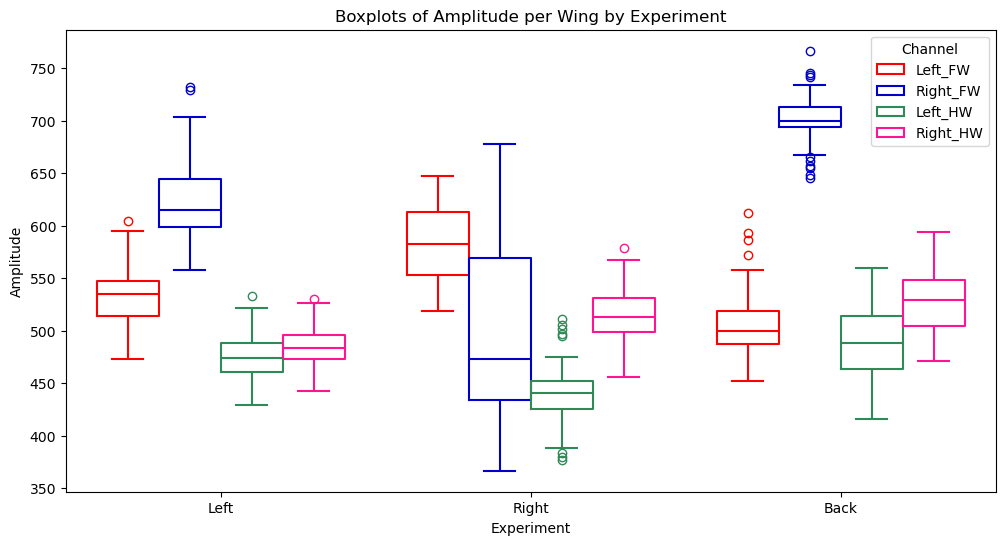

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data for easier visualization
melted_df = df.melt(id_vars='Experiment', var_name='Channel', value_name='Value')

# Define the colors for each channel
channel_colors = {
    'Left_FW': 'r',
    'Right_FW': 'mediumblue',
    'Left_HW': 'seagreen',
    'Right_HW': 'deeppink'
}

# Plot boxplots with custom colors
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Experiment', 
    y='Value', 
    hue='Channel', 
    data=melted_df, 
    palette=channel_colors,  # Use the custom color palette
    fill = False
)
plt.title('Boxplots of Amplitude per Wing by Experiment')
plt.ylabel('Amplitude')
plt.xlabel('Experiment')
plt.legend(title='Channel')
plt.show()


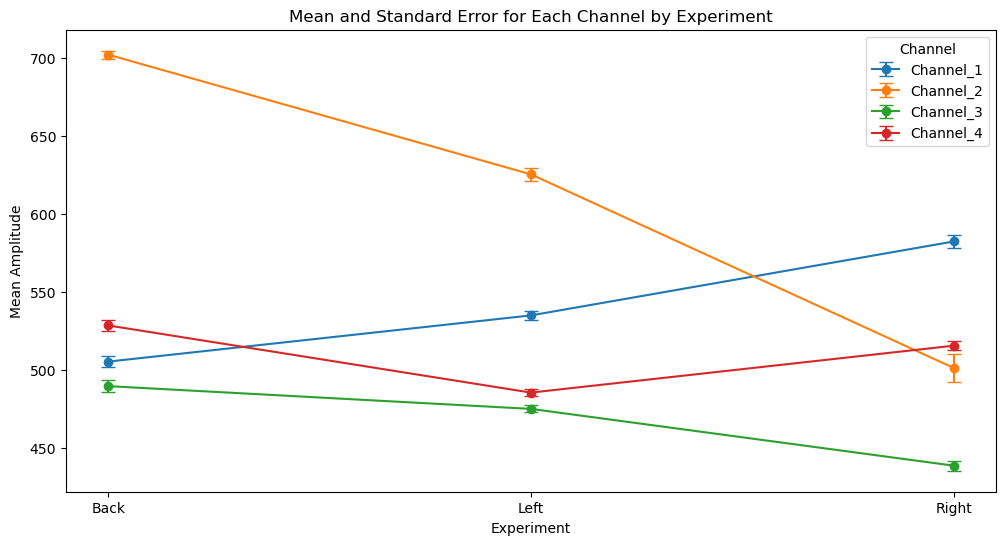

In [33]:
import numpy as np

# Calculate means and standard errors
summary = melted_df.groupby(['Experiment', 'Channel']).Value.agg(['mean', 'sem']).reset_index()

# Plot means with error bars
plt.figure(figsize=(12, 6))
for channel in df.columns[:-1]:  # Skip 'Experiment' column
    subset = summary[summary['Channel'] == channel]
    plt.errorbar(subset['Experiment'], subset['mean'], yerr=subset['sem'], label=channel, capsize=5, marker='o')

plt.title('Mean and Standard Error for Each Channel by Experiment')
plt.ylabel('Mean Amplitude')
plt.xlabel('Experiment')
plt.legend(title='Channel')
plt.show()


/Users/srinidhienaidu/anaconda3/envs/cse599n/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


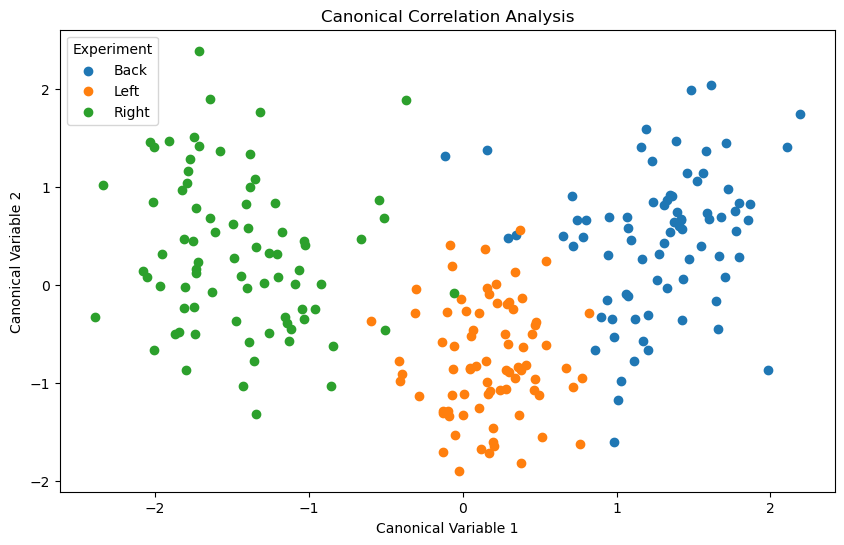

In [34]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import OneHotEncoder

# Encode the categorical variable for CCA
encoder = OneHotEncoder(sparse=False)
experiment_encoded = encoder.fit_transform(df[['Experiment']])

# Perform CCA
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(df.iloc[:, :-1], experiment_encoded)

# Scatter plot of canonical variables
plt.figure(figsize=(10, 6))
for i, group in enumerate(encoder.categories_[0]):
    plt.scatter(X_c[df['Experiment'] == group, 0], X_c[df['Experiment'] == group, 1], label=group)

plt.title('Canonical Correlation Analysis')
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.legend(title='Experiment')
plt.show()
